# Field Test 4/23/24 Indoor
On 4/15/24 a field test was completed to evaluate the effectivness of the multiparameter low-cost sensor versus a commerical sensor. 

## Methods 

After both the chlorophyll and turbidity components of the sensor underwent standard dilution tests and had an appropriate R2 value, and the housing was constructed for the sensor, field tests were performed on the sensor. Field testing was performed in the Intracoastal Waterway (ICW) this is a waterbody that spans from the North Atlantic to the Gulf of Mexico and is primarily composed of saltwater. The fieldwork performed was in the southern North Carolina portion of the ICW at the UNCW Center for Marine Science. This location was chosen as the Coastal Ocean Research and Monitoring Program (CORMP). Water samples were collected using a YSI at the CMS dock at 15-minute intervals. This provides an effective commercial sensor to compare with the results of the low-cost sensor. This sensor is located at the end of the CMS dock. Following the field sampling in the morning of April 23rd, field sampling was performed again in the afternoon. However, for this sampling, the sensor performed its measurements indoors. This was performed to determine if the sensor needed to be in the same place it was calibrated to obtain accurate results. This testing was performed between 11:30am and 1:45pm at 15-minute intervals. Like the morning field tests, the water sample was obtained from the dock using a Van Dorn Sampler. This water sample was then transferred to an amber Nalgene bottle and walked back to the lab. A cuvette was filled with the water sample until it overflowed and dumped out 3 times. Then the fourth time the cuvette was filled to the top and placed into the sensor. The sensor was then covered with the cap as well as a cardboard box to ensure no ambient light was getting into the sensor. The turbidity was measured first by the sensor for one minute and then the chlorophyll was measured by the sensor for one minute. The Nalgene bottle water sample was then dumped out down the lab sink. This was repeated 9 more times, walking to the dock for the water sample and then walking back to the lab to the sensor.  

The average chlorophyll measurments in F8 values from the low-cost sensor was run through the equation y = 0.7231x + 9.0639 this is the line of best fit equation derived from the chlorophyll dilution tests in the water resistant hoising. 

The average turbidity measurments in NIR values from the low-cost sensor was run through the equation y = 76.3208x + 1578.2578 this is the line of best fit equation derived from the turbiodity dilution tests in the water resistant hoising. 

The CORMP measurements for both chlorophyll and turbidity were obtained from: https://cormp.org/?health=Off&quality=Off&units=English&duration=3%20days&maps=storm_tracks&legend=Off&forecast=Point&hti=&nhc=undefined&nhcWinds=undefined&sst=&current=&datum=MLLW&windPrediction=wind%20speed%20prediction&region=&bbox=-97.20703125000001,21.4121622297254,-63.67675781250001,43.35713822211053&iframe=null&mode=home&basemap=Streets&basemap_overlays=Bathymetry&layer_opacity=100&platform=CMSDOCK

# Chlorophyll Results

The chlorophyll measurements from the low-cost sensor and commercial sesnor were compared. The commercial sensor values were plotted on the x-axis and the low-cost sensor values were plotted on the y-axis. The R2, and line-of-best fit were calculated, with the following code. 

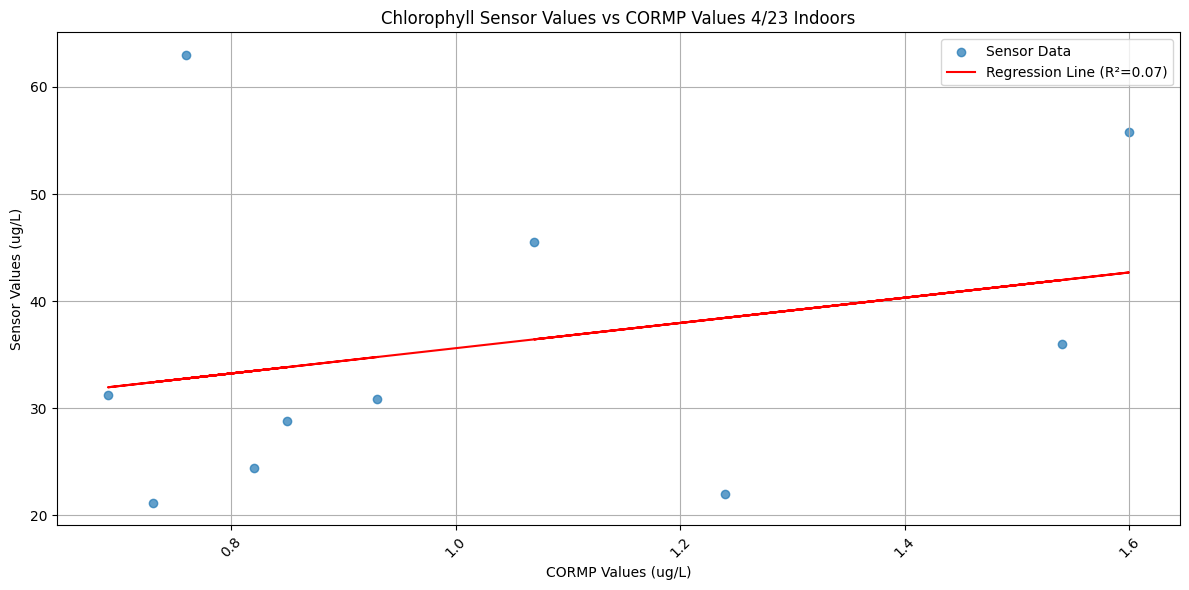

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Additional FTU values from another source

additional_chl_values = {
     ' Approx Time': ['11:30', '11:45', '12:00', '12:15', '12:30', '12:45', '13:00', '13:15', '13:30', '13:45'],
    'ug/L': [0.93, 0.69, 0.85, 0.73, 0.82, 0.76, 1.54, 1.07, 1.60, 1.24]
} #4/23 insode


## Read the CSV file
df = pd.read_csv('/Users/jessiewynne/inside_test_chl_4_23_24_no_time.csv')

# Clean the 'NIR (Raw)' column
df['F8 (Raw)'] = pd.to_numeric(df['F8 (Raw)'], errors='coerce')

# Remove rows with NaN values in the 'NIR (Raw)' column
df_csv = df.dropna(subset=['F8 (Raw)'])

# Group by 'Approx Time' and calculate the average of 'NIR (Raw)' for each group
averages_csv = df_csv.groupby(' Approx Time')['F8 (Raw)'].mean()

# Solve for x using the equation y = 76.3208x + 1578.2578
x_values_csv = ((averages_csv - 9.0639) / 0.7231)

# Create a DataFrame for the additional FTU values
df_chl = pd.DataFrame(additional_chl_values)

# Merge the CSV and additional FTU DataFrames on 'Approx Time' with specified suffixes
merged_df = pd.merge(df_chl, pd.DataFrame(averages_csv), left_on=' Approx Time', right_index=True, how='inner', suffixes=('_x', '_y'))

# Reset the index of x_values_csv
x_values_csv = x_values_csv.reset_index(drop=True)

# Filter out the 'DI' row
df_f8 = df_chl[df_chl[' Approx Time'] != 'DI']

# Plot the data
plt.figure(figsize=(12, 6))
plt.scatter(df_f8['ug/L'], x_values_csv, label='Sensor Data', alpha=0.7)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_f8['ug/L'], x_values_csv)

# Calculate R-squared
r_squared = r_value ** 2

# Plot the regression line
plt.plot(df_f8['ug/L'], slope * df_f8['ug/L'] + intercept, color='red', label=f'Regression Line (R²={r_squared:.2f})')

plt.xlabel('CORMP Values (ug/L)')
plt.ylabel('Sensor Values (ug/L)')
plt.title('Chlorophyll Sensor Values vs CORMP Values 4/23 Indoors')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Turbidity Results

The turbidity measurements from the low-cost sensor and commercial sesnor were compared. The commercial sensor values were plotted on the x-axis and the low-cost sensor values were plotted on the y-axis. The R2, and line-of-best fit were calculated, with the following code. 

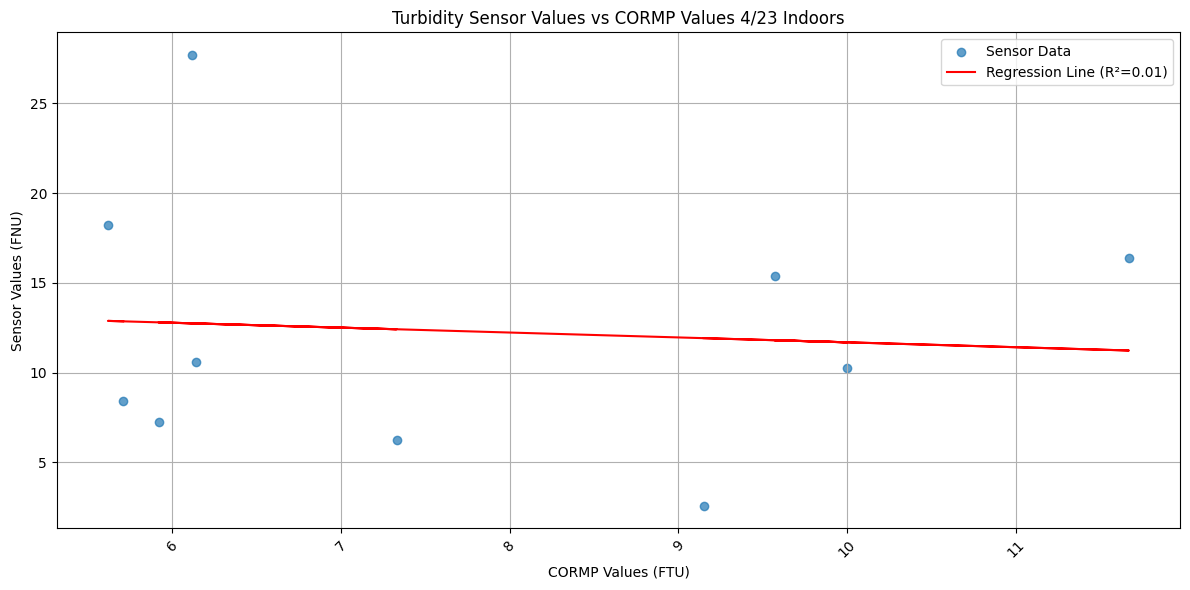

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


# Additional FTU values from another source
additional_fnu_values = {
    ' Approx Time': ['11:30', '11:45', '12:00', '12:15', '12:30', '12:45', '13:00', '13:15', '13:30', '13:45'],
    'FNU': [5.71, 5.62, 6.14, 5.92, 7.33, 6.12, 10.00, 9.57, 11.67, 9.15] # afternoon 4/23 data
}


## Read the CSV file
df = pd.read_csv('/Users/jessiewynne/inside_test_turb_4_23_24_no_time.csv')

# Clean the 'NIR (Raw)' column
df['NIR (Raw)'] = pd.to_numeric(df['NIR (Raw)'], errors='coerce')

# Remove rows with NaN values in the 'NIR (Raw)' column
df_csv = df.dropna(subset=['NIR (Raw)'])

# Group by 'Approx Time' and calculate the average of 'NIR (Raw)' for each group
averages_csv = df_csv.groupby(' Approx Time')['NIR (Raw)'].mean()

# Solve for x using the equation y = 76.3208x + 1578.2578
x_values_csv = (averages_csv - 1507.2419) / 79.5485

# Create a DataFrame for the additional FTU values
df_fnu = pd.DataFrame(additional_fnu_values)

# Merge the CSV and additional FTU DataFrames on 'Approx Time' with specified suffixes
merged_df = pd.merge(df_fnu, pd.DataFrame(averages_csv), left_on=' Approx Time', right_index=True, how='inner', suffixes=('_x', '_y'))

# Reset the index of x_values_csv
x_values_csv = x_values_csv.reset_index(drop=True)

# Filter out the 'DI' row
df_f8 = df_fnu[df_fnu[' Approx Time'] != 'DI']

# Plot the data
plt.figure(figsize=(12, 6))
plt.scatter(df_f8['FNU'], x_values_csv, label='Sensor Data', alpha=0.7)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_f8['FNU'], x_values_csv)

# Calculate R-squared
r_squared = r_value ** 2

# Plot the regression line
plt.plot(df_f8['FNU'], slope * df_f8['FNU'] + intercept, color='red', label=f'Regression Line (R²={r_squared:.2f})')

plt.xlabel('CORMP Values (FTU)')
plt.ylabel('Sensor Values (FNU)')
plt.title('Turbidity Sensor Values vs CORMP Values 4/23 Indoors')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()